# "Car Accident Severity". 

## In this project I will  predict the severity of car accidents by Applying Classification Algorithms.

---

#   **1. Introduction and Understanding of this problem**


                               Road accidents in India claimed over 1.5 lakh lives in 2018.

    The ministry of road transport and highways issued a report on Road accidents in India in 2018, which showed that road accidents last year increased by 0.46% as compared to 2017.A total of 4,67,044 road accidents have been reported by States and Union Territories (UTs) in the calendar year 2018, claiming 1,51,417 lives and causing injuries to 4,69,418 persons.Over-speeding accounted for 64.4% of the persons killed.India, ranks 1st in the number of road accident deaths across the 199 countries reported in the World Road Statistics, 2018 followed by China and US. As per the WHO Global Report on Road Safety 2018, India accounts for almost 11% of the accident related deaths in the World.

    National Highways which comprise of 1.94 percent of total road network, accounted for 30.2 per cent of total road accidents and 35.7 per cent of deaths in 2018. State Highways which account for 2.97% of the road length accounted for 25.2 percent and 26.8 percent of accidents and deaths respectively.

    As India having a major problem of water-logging during monsoon, this analysis can help BMC and the Road Department can predict the weather and take precautions in advance so that accidents especially during rainfalls can be reduced to quite a bit.

    I would like to know if we can reduce this severity and avoid future accidents by analyzing and applying various Classification Machine Learning Algorithms on the data provided by IBM.This study will hopefully reveal what, if any, measures we can take as individuals and municipalities to make travel in India safer especially under harsh weather conditions.

# 2. Data Explaination

## Importing Essential Libraries And our Car Dataset

In [ ]:
# Importing Only Essential Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.plotting.backend = "plotly"
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Importing Data
dataset = pd.read_csv('Data_Collisions.csv', low_memory = False)
dataset.head(10)

------------------------------------------------------------------------

# Data Preprocessing

In [ ]:
print('Number of Rows:',dataset.shape[0])
print('Number of Columns:',dataset.shape[1])

## As seen above this dataset contains 194673 Rows and 38 Columns. But, it also contains some Nan values which we need to remove from the data in order to get a perfect model accuracy.

## Notice that in the data I have moved the Severity column to the very last just for the ease of analysing; as you will see below.

In [ ]:
dataset.isnull().sum()

In [ ]:
# Dropping all the irrelevant rows
dataset.drop(['X', 'Y', 'OBJECTID', 'REPORTNO', 'STATUS','PEDROWNOTGRNT', 'SDOTCOLNUM', 'INCKEY', 'INCDATE', 'LOCATION', 'INCDTTM', 'INATTENTIONIND', 'UNDERINFL', 'COLDETKEY', 'SPEEDING', 'INATTENTIONIND', 'INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC'], axis = 1, inplace = True)

In [ ]:
dataset.isnull().sum()

In [ ]:
# Dropping all NaN Values
dataset.dropna(axis = 0, inplace = True)

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset = pd.DataFrame(dataset)
dataset.head(10)

In [ ]:
dataset.dtypes

### We will convert ST_COLCODE to int as it is an integer. We will also convert SEVERITY to object as we want to apply our classifier model on it to predict accident severity.

In [ ]:
dataset['ST_COLCODE'] = dataset['ST_COLCODE'].astype(np.int64)
dataset['SEVERITY'] = dataset['SEVERITY'].astype(object)

In [ ]:
dataset.dtypes

----------------------------------------------------------------------------------

# Data Visualization

## Now that our data is cleaned properly, lets visualize it.

In [ ]:
a = dataset['SEVERITY'].value_counts()
xx = a.index
yy = a.values
fig = px.bar(dataset['SEVERITY'], x=xx, y=yy, color = xx)
fig.show()

In [ ]:
fig = px.histogram(dataset['ADDRTYPE'])
fig.show()

In [ ]:
a = dataset['SEVERITYDESC'].value_counts()
xx = a.index
yy = a.values
fig = px.bar(dataset['SEVERITYDESC'], x=xx, y=yy, color = xx)
fig.show()

In [ ]:
a = dataset['COLLISIONTYPE'].value_counts()
df = dataset['COLLISIONTYPE']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [ ]:
a = dataset['PERSONCOUNT'].value_counts()
df = dataset['PERSONCOUNT']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [ ]:
a = dataset['WEATHER'].value_counts()
df = dataset['WEATHER']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [ ]:
a = dataset['ROADCOND'].value_counts()
df = dataset['ROADCOND']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [ ]:
a = dataset['LIGHTCOND'].value_counts()
df = dataset['LIGHTCOND']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [ ]:
a = dataset['ST_COLDESC'].value_counts()
df = dataset['ST_COLDESC']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

### Following are the observations we have concluded after visualizing our data:
    1. Number of accidents with Severity 1 is greater that that of Severity 2. Severity 1 has total a of 124.258k fatalities while that of Severity 2 is of 55.809k.
    2. More accidents occur at Blocks compared to Intersections. Number of accidents at occured at Block are 117.085k while that of Intersections are 62.982k.
    3. As seen in point No.1, it is good to see that most collisions caused only property damage like roads, vehicles etc. rather than causing Injuries. The numbers are also the same - Property Damage = 124.258k & Injury Collisions = 55.809k
    4. Top 3 accidents have occurred when:
            1 - Cars were parked and not moving. Total of 42.886k Fatalities.
            2 - At road angles.Probably occurred when one or more person(s) failed to notice another vehicle coming out from the                 other side of the road. Total of 34.353k Fatalities.
            3 - At Rear Ends. This one occurs mostly when a person tries to overtake another vehicle in front of them.
                Total of 32.778k Fatalities.
    5. Maximum 2 to 3 Persons were involved in a particular accident. No of accidents with 2 persons - 104.408k.  No of                accidents with 3 persons - 34.356k.

Most surprising thing to see is that most accidents have occured when one of the two cars involved in an accident was parked and still. Also most accidents have occured in broad Daylight when the weather conditions were good. This is probably because of the roads. The roads are not well maintained and must be crooky or bumped here and there. From my observation, it is the Roads that need maintenance although we will come to our conclusion only after applying our Machine Learning Models on this data.  

----

# Now the favourite part. MACHINE LEARNING !!

Since we are going to predict Car Accident Severity which is a Categorical Variable, either 1 or 2 , we will use a Classification Algorithm.

There are many classification Algorithms but for this case we will use XGBoost model as it has proven to give highest accuracy among all the different models.

Below is a short explaination of XGBoost algorithm.

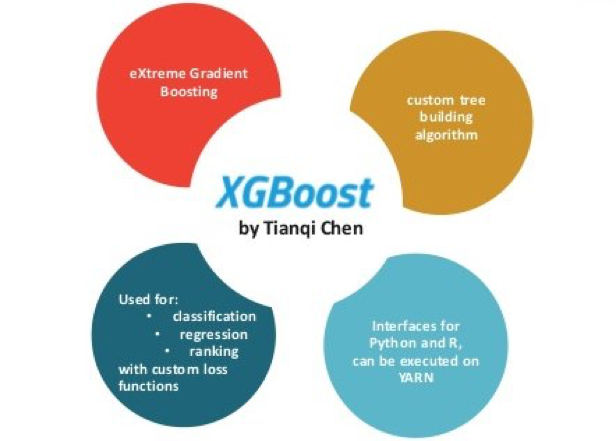

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

### Encoding Categorical Data Using OneHotEncoding

In [ ]:
dataset.head()

In [ ]:
# Seeing the hidden columns after 'JUNCTIONTYPE'
dataset.iloc[:, 9:]

# Encoding Categorical Data

## Encoding the Independent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), (0, 1, 2, 7, 9, 10, 11, 12, 14, 17))], remainder = 'passthrough')
X = (ct.fit_transform(X)).toarray()

In [ ]:
print(X)

## Encoding the Dependent Variable 

In [ ]:
print(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

# Splitting the dataset into Training Set & Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

# K-Nearest Neighbors

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# Logistic Regression

In [ ]:
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)

In [ ]:
#y_pred = classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
#accuracy_score(y_test, y_pred)

In [ ]:
#accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Training XGBoost on the Training set

In [ ]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

## Making the Confusion Matrix

In [ ]:
y_pred_xg = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xg)
print(cm)
accuracy_score(y_test, y_pred_xg)

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))